<a href="https://colab.research.google.com/github/RachelRamirez/CIFAR-10/blob/main/Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

import numpy as np

In [81]:
dataset, info = tfds.load('cifar10', split=tfds.Split.TRAIN, with_info = True)

dataset_airplanes   = dataset.filter(lambda x: x['label'] == 0)
dataset_automobile  = dataset.filter(lambda x: x['label'] == 1)
dataset_birds       = dataset.filter(lambda x: x['label'] == 2)
dataset_cats        = dataset.filter(lambda x: x['label'] == 3)
dataset_deers       = dataset.filter(lambda x: x['label'] == 4)
dataset_dogs        = dataset.filter(lambda x: x['label'] == 5)
dataset_frogs       = dataset.filter(lambda x: x['label'] == 6)
dataset_horses      = dataset.filter(lambda x: x['label'] == 7)
dataset_ships       = dataset.filter(lambda x: x['label'] == 8)
dataset_trucks      = dataset.filter(lambda x: x['label'] == 9)

##  Ways to count the number of images in the sets:
# print(tf.data.experimental.cardinality(dataset).numpy()) #   prints 50,000, correct
# print(tf.data.experimental.cardinality(dataset_airplanes).numpy()) #   prints -2 this is a "feature" in tf when a set takes too long to count
# print(dataset_airplanes.reduce(np.int64(0), lambda x,_ : x + 1).numpy()) #prints 5000, correct

##  This is a way of asserting that all the images have the same label in a set
for feature_dict in dataset_dogs:
  assert feature_dict['label'] == 5
 

-2
50000
5000


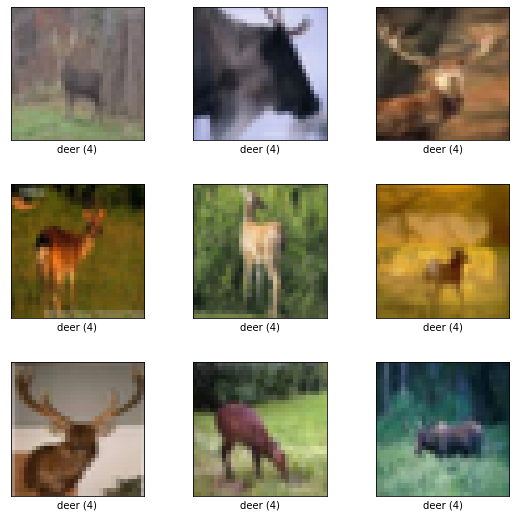

In [82]:
## Tfds.show_examples is a matplotlib funnction that only works on image ds's, and you have to pass it the "info" for some reason
fig = tfds.show_examples(dataset_deers, info)

How to display one picture of a dataset using `next(iter(dataset)`

tf.Tensor(5, shape=(), dtype=int64)


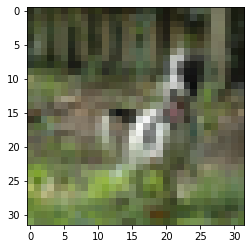

In [83]:
feature_dict = next(iter(dataset_dogs))

print(feature_dict['label'])
plt.imshow(feature_dict['image'])

# Get 1000 samples from each dataset class and create validation set

In [1]:
# I want 10 un replicated samples from dataset_airplanes + dataset_automobiles... dataset_trucks.

# There are 5000 images of each Class 
# I want 10 equal sets A, B, C, D, ... J plus a validation set
# I want 10,000 total images in the validation set with 1000 of each class
# and I want 10 sets of training images  4000 total images, so 400 images in each class

N = 1000
dataset_airplanes_val   = dataset_airplanes.take(N)
dataset_automobile_val  = dataset_automobile.take(N)
dataset_birds_val       = dataset_birds.take(N)  
dataset_cats_val        = dataset_cats.take(N)
dataset_deers_val       = dataset_deers.take(N)
dataset_dogs_val        = dataset_dogs.take(N)
dataset_frogs_val       = dataset_frogs.take(N)
dataset_horses_val      = dataset_horses.take(N)
dataset_ships_val       = dataset_ships.take(N)
dataset_trucks_val      = dataset_trucks.take(N)


# Make sure to skip the next 1000 images in each data set before making training set
dataset_airplanes   = dataset_airplanes.skip(N)
dataset_automobile  = dataset_automobile.skip(N)
dataset_birds      = dataset_birds.skip(N)  
dataset_cats        = dataset_cats.skip(N)
dataset_deers       = dataset_deers.skip(N)
dataset_dogs        = dataset_dogs.skip(N)
dataset_frogs       = dataset_frogs.skip(N)
dataset_horses      = dataset_horses.skip(N)
dataset_ships       = dataset_ships.skip(N)
dataset_trucks      = dataset_trucks.skip(N)

# # Check that remaining dataset does not have validation data
# fig = tfds.show_examples(dataset_ships, info)
# fig = tfds.show_examples(dataset_ships_val, info)
# # I checked and they dont.


# NOW, How do I combine my val sets?

# Hint1 its not this... 
# val = dataset_airplanes_val + dataset_automobile_val + dataset_birds_val

# #  Hint2 its also not this implementation of zip because the info file doesn't match it
# val = tf.data.Dataset.zip((dataset_airplanes_val,
#                     dataset_automobile_val,
#                     dataset_birds_val,
#                     dataset_cats_val,
#                     dataset_deers_val,
#                     dataset_dogs_val,
#                     dataset_frogs_val,
#                     dataset_horses_val,
#                     dataset_ships_val,
#                     dataset_trucks_val ))

# print(val.cardinality())  # -2 ?
# print(tf.data.experimental.cardinality(val).numpy()) # -2,   why?
# print(val.reduce(np.int32(0), lambda x,_ : x + 1))  # this shows 1000, but it should be 10000?
# #  I tried zipping and I get a cardinality of -2 when I expected 1000*10=10,000
# print(tf.data.experimental.cardinality(dataset_airplanes_val).numpy())  # also prints -2
# print(tf.data.experimental.cardinality(dataset_airplanes).numpy()) # also prints -2
# fig = tfds.show_examples(val, info)   # Returns a warning that the info file is not compatible


# is it concatenate? YESSSSSSSSSSSSSSSSSSSSSS
val = dataset_airplanes_val.concatenate(dataset_automobile_val)
# This is how I checked that it worked
# fig = tfds.show_examples(val.skip(999), info)   # Returns a warning that the info file is not compatible

val = val.concatenate(dataset_birds_val)
val = val.concatenate(dataset_cats_val)
val = val.concatenate(dataset_deers_val)
val = val.concatenate(dataset_dogs_val)
val = val.concatenate(dataset_frogs_val)
val = val.concatenate(dataset_horses_val)
val = val.concatenate(dataset_ships_val)
val = val.concatenate(dataset_trucks_val)
 
# print(val.cardinality())  # returns -2 
print(val.reduce(np.int32(0), lambda x,_ : x + 1))  # this shows 10000! Thank goodness! :-)



# Now I need to split the remaining images of each data set in the remaining datasets into different training groups and
# mini_ds_airplanes = dataset_airplanes.skip(9)
# mini_ds_airplanes = mini_ds_airplanes.take(9)
# B = dataset_airplanes.shard(400, index=0)
# C = dataset_airplanes.shard(1000, index=1)
# list(B.as_numpy_iterator())
# list(C.as_numpy_iterator())
# mini_ds_airplanes
# plt.imshow(feature_dict['image'])
40000/16/10

250.0

# Create small groups of training_sets:

The image below is a table of the planned training set divided into 16 groups of 250 images per class, resulting in each of the 16 groups named A through P, having a total of 2500 images each.  There are initially 16 groups, and then they are merged by 2s into 8 groups of 2s, and then 4 groups of 4, until they are merged for the 5th time into one large group of 16 groups, which is the original training set.  This grouping and division allows one to study 5 different image sizes, and the number per class is a relatively easy number to work with for reviewing the final confusion matrices resulting from each run.  Although there are many discrete mathematical combinations possible for combining the groups, this is not the focus of the study, the goal is to have a clear  data division that is repeatable and consistent throughout the test.   

 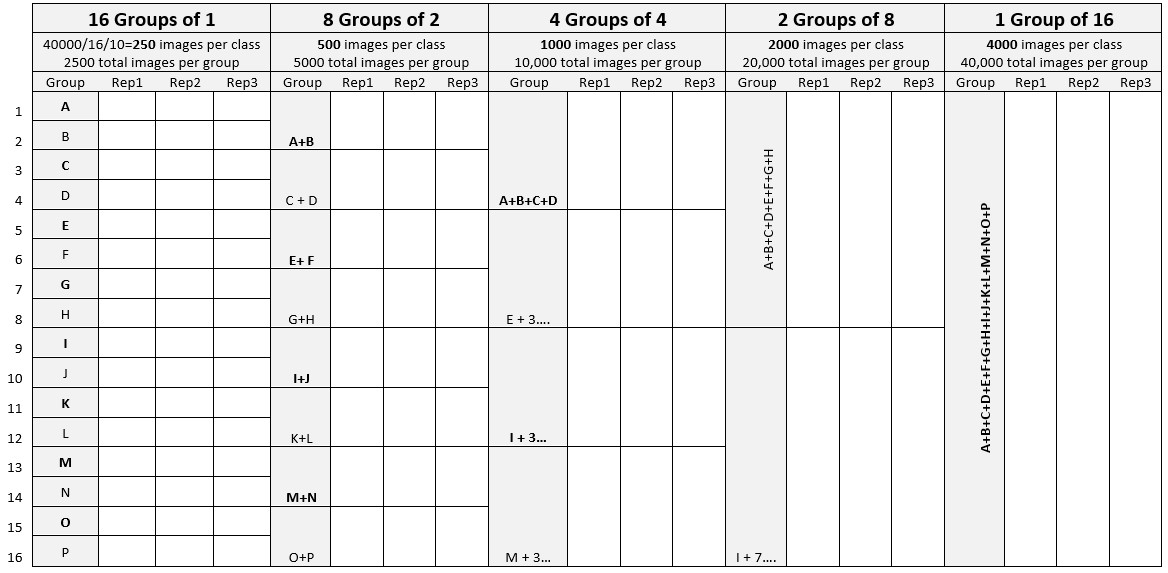

# Create small groups of training_sets: implementation

The plan is to see if I can use shards to make the data division easy.